<a href="https://colab.research.google.com/github/ksh-dong/Python25Study/blob/main/07_02_%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EB%94%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 인공 신경망에 층을 추가하여 데이터셋을 분류하면 딥! -> 심층 신경망

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고
# 텐서플로 연산을 결정적으로 만듭니다.

import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255

train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [9]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [10]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [11]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


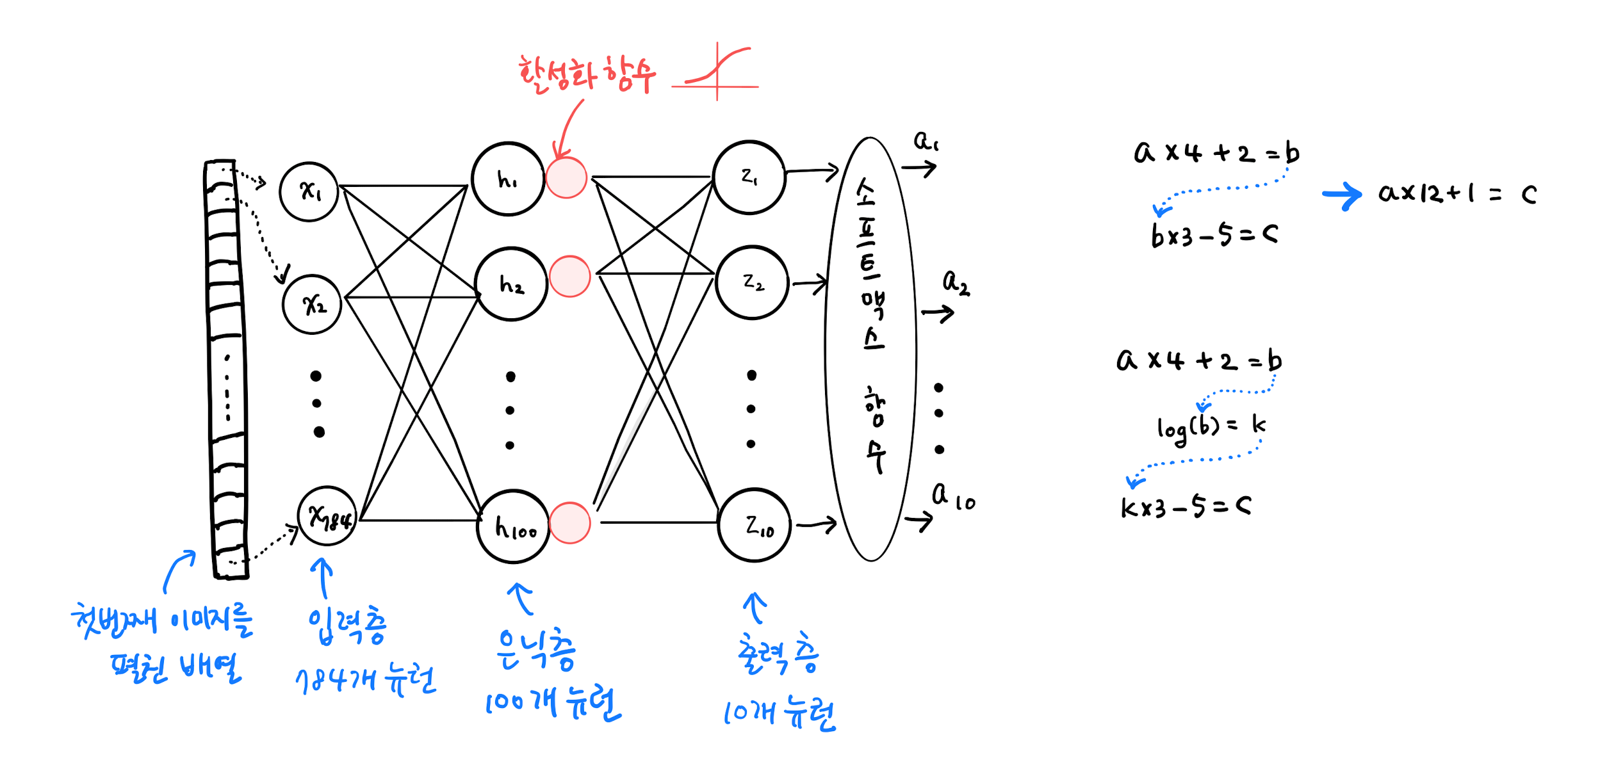

In [17]:
# 인공 신경망 모델에 2개의 레이어를 추가해 보겠다
# 전에 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집 층이 추가된 것
#   -> 은닉층(hidden layer)

# 은닉층에는 주황색원으로 활성화 함수가 표시되어 있다.
# 활성화 함수는 신경망 층의 선형 방정식 계산 값에 적용하는 함수이다.
# 출력층에 적용하는 활성화 함수는 종류가 제한되어 있음
#   이진분류(시그모이드함수), 다중분류(소프트맥스함수) -> 분류를 위한
# 은닉층은 활성화 함수가 자유롭다 (대표적 : 시그모이드함수, 볼 렐루 함수....)
# a*4+2*b -> b*3-5=c 라고 했을 때  b가 하는 일은 임시용 -> a*12+1=c

# 신경망도 마찬가지로 은닉층에서 선형적인 산술 계산만 수행다면 수행 역할이 없는 셈
# 선형 계산을 적당하게 비선형적으로 비틀어 줘야 함
# 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있다.
# a*4+2*b -> log(b)=k -> k*3-5=c 라고 했을 때 log(b)=k 가 하는 일은?


In [21]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를
# 사용한 출력층을 케라스 Dense 클래스로 만들어 보자.

dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
#input_shape=(784,) 입력의 크기 필수
# dense1의 목표 : 784개의 입력을 시그모이드 함수를 이용해서 100개로 만들어봐~
# https://gooopy.tistory.com/52

# dense1 이 은닉층이고 100개의 뉴런을 가진 밀집층, 활성화 함수를 시그모이드로 설정
# 몇개의 뉴런이 필요할 지는 경험적으로 기입
# 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야 한다.
# (클래스 10개에 대한 확률을 예측해야 하는데 은닉층의 뉴런이 10개 이하면 안됨)

dense2 = keras.layers.Dense(10, activation='softmax')
# dense2는 출력층으로 설정 (10개의 클래스를 분류하므로 10개의 뉴런을 둠)
# https://wikidocs.net/120089
# 활성화 함수로 소프트 맥스 함수로 지정



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# 심층 신경망 만들기 (순차적으로 적용하기 위한 모델)

model = keras.Sequential([dense1, dense2])

# 위에서 만든 dense1, dense2를 Sequential 클래스에 추가하여 심층(deep) 신경망을 만듬
# dense1, dense2를 리스트로 만들어 전달함
# 주의 : 뒤에가 출력층임으로 dense2를 설정
# 인공 신경망의 강력한 성능은 층을 추가하여 입력 데이터에 대해
# 연속적인 학습을 진행하는 능력 -> 2개 이상 층을 추가 가능


In [24]:
model.summary()     # 층에 대한 유용한 정보가 나옴

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 맨 첫줄에 모델의 이름, 그 다음 이 모델이 들어 있는 층이 순서대로 나옴
# 맨 처음 추가한 은닉층에서 출력층의 순서대로 나옴

# 층이름(클래스), 출력크기, 모델 파라미터 개수
# 층이름을 지정하지 않으면 케라스가 자동으로 Dense라고 이름을 붙임
# 출력크기 (None(샘플의 개수: 아직 정의되지 않음), 100)
#    -> 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면
#       이 데이터를 한번에 모두 사용하지 않고 잘게 나누어
#       여러번 걸쳐 경사 하강법 단계를 수행(미니배치 경사 하강법)
#       케라스의 기본 미니배치 크기는 32개 임

# 이 값은 fit() 메서드에서 batch_szie 매개변수로 변경 가능 따라서
# 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정이 최선

# 신경망 층에서 입력되거나 출력되는 배열의 첫 번째 차원을 배치 자원이라고 부름

# 출력크기 (None, 100 -> 은닉층의 뉴런 개수를 100개임으로 100개의 출력이 나옴)
#   -> 샘플마다 784개의 필셀 값이 은닉층을 통과하면서 100개의 특성으로 압축
# 마지막으로 파라미터 개수가 출력됨 784 * 100 + 100 = 78500
# 공식 암기 : 입력개수 * 출력개수(절편) + 출력개수(절편) = 파라미터수

In [ ]:
# 두번째 층의 출력 크기 (None, 10) -> 뉴런 개수가 10개임
# 파라미터는 100 * 10 + 10 = 1010개

# 맨 아래 있는 Non-trainable params: 0 (0.00 B) 는 훈련되지 않는 파라미터
# (간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터)